In [1]:
import os
import numpy as np
from scipy.stats import pearsonr
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.patches import ConnectionPatch

/data5/deepro/miniconda3/envs/starrseq/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [2]:
abc_activity_file = "/data5/deepro/starrseq/papers/results/6_link_da_enhancers_to_de_genes/data/activity_vs_expression_corr/abc_da_de_table.csv"
nearest_activity_file = "/data5/deepro/starrseq/papers/results/6_link_da_enhancers_to_de_genes/data/activity_vs_expression_corr/nearest_da_de_table.csv"

In [3]:
libraries = ["CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]

In [4]:
def get_active_enhancer_corr(activity_file, libraries, save_file):
    activity_df = pd.read_csv(activity_file, low_memory=False)
    # select only active enhancers
    activity_query = " | ".join([f"(`{lib}_peak`==1)" for lib in libraries])
    activity_df = activity_df.query(activity_query)
    # remove low expression
    expression_query = " | ".join([f"(`{lib}_exp`>=1)" for lib in libraries])
    activity_df = activity_df.query(expression_query)
    # # keep their target gene column, target gene exp columns and activity columns and chrom_coord column
    cols_to_keep = ["chrom_coord", "gene_name", "per_gene_corr"]
    cols_to_keep = cols_to_keep + [f"{lib}_act" for lib in libraries]
    cols_to_keep = cols_to_keep + [f"{lib}_padj_act" for lib in libraries[1:]]
    cols_to_keep = cols_to_keep + [f"{lib}_exp" for lib in libraries]
    cols_to_keep = cols_to_keep + [f"{lib}_padj_exp" for lib in libraries[1:]]
    activity_df = activity_df.loc[~activity_df.per_gene_corr.isna(), cols_to_keep]
    activity_df.to_csv(save_file, index=False)
    return activity_df

In [5]:
abc_save_file = "/data5/deepro/starrseq/papers/results/6_link_da_enhancers_to_de_genes/data/activity_vs_expression_corr/abc_da_de_table_peaks.csv"
nearest_save_file = "/data5/deepro/starrseq/papers/results/6_link_da_enhancers_to_de_genes/data/activity_vs_expression_corr/nearest_da_de_table_peaks.csv"

In [28]:
abc_df = get_active_enhancer_corr(abc_activity_file, libraries, abc_save_file)
nearest_df = get_active_enhancer_corr(nearest_activity_file, libraries, nearest_save_file)

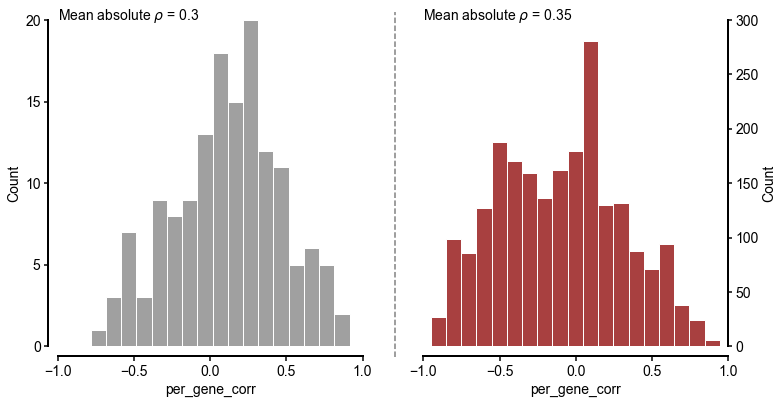

In [83]:
# define canvas
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True)
# abc df
sns.histplot(data=abc_df, x="per_gene_corr", bins=20, binwidth=0.1, ax=axes[0], edgecolor="w", color="grey")
# nearest df
sns.histplot(data=nearest_df, x="per_gene_corr", bins=20, binwidth=0.1, ax=axes[1], edgecolor="w", color="darkred")
# abc figure modify
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_yticks([0, 5, 10, 15, 20])
axes[0].set_ylim(0, 20)
axes[0].set_xlim(-1, 1)
abs_per_gene_corr=round(abc_df.per_gene_corr.abs().mean(), 2)
axes[0].text(-1, 20, fr"Mean absolute $\rho$ = {abs_per_gene_corr}")
axes[0].spines.left.set_position(('outward', 10))
axes[0].spines.bottom.set_position(('outward', 10))

# nearest figure modify
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].spines[['top', 'left']].set_visible(False)
axes[1].set_yticks([0, 50, 100, 150, 200, 250, 300])
axes[1].set_ylim(0, 300)
axes[1].set_xlim(-1, 1)
nearest_per_gene_corr=round(nearest_df.per_gene_corr.abs().mean(), 2)
axes[1].text(-1, 300, fr"Mean absolute $\rho$ = {nearest_per_gene_corr}")
axes[1].spines.left.set_position(('outward', 10))
axes[1].spines.bottom.set_position(('outward', 10))

# creating a separation between the plots
transFigure = fig.transFigure.inverted()
line1 = matplotlib.lines.Line2D((0.515,0.515),(0.1,0.9),
                               transform=fig.transFigure,
                               ls='--',
                               color='grey')
fig.lines.extend([line1])

In [84]:
save_file = "../data/figures/enhancer_gene_corr.pdf"
save_pdf(save_file, fig)

In [38]:
coord2

array([0.97709227, 0.12883833])

In [37]:
coord1

array([0.55436499, 0.84404762])

In [7]:
abc_df.per_gene_corr.abs().mean()

0.29941242989861655

In [9]:
nearest_df.per_gene_corr.abs().mean()

0.3502843447529643

In [10]:
nearest_df

,chrom_coord,gene_name,per_gene_corr,CC_act,ATF2_act,CTCF_act,FOXA1_act,LEF1_act,SCRT1_act,TCF7L2_act,...,SCRT1_exp,TCF7L2_exp,16P12_1_exp,ATF2_padj_exp,CTCF_padj_exp,FOXA1_padj_exp,LEF1_padj_exp,SCRT1_padj_exp,TCF7L2_padj_exp,16P12_1_padj_exp
1176,chr11_73779097_73779597,MRPL48,0.904762,1.644185,1.533034,1.360737,2.543424,2.189138,1.562457,2.133918,...,4.419474,4.526740,4.623657,6.833631e-34,1.188662e-01,1.103080e-13,1.525103e-10,4.348088e-01,8.872449e-11,2.070433e-04
1277,chr17_78557908_78558408,DNAH17,0.904762,3.601055,4.495957,2.742769,4.530061,4.823544,3.422856,4.308837,...,0.212255,0.294653,0.344245,8.640649e-111,2.582323e-02,1.035276e-35,1.860911e-22,9.634542e-01,3.609068e-07,1.799680e-10
1301,chr17_78557808_78558308,DNAH17,0.904762,3.429477,4.304314,2.589448,4.324112,4.707291,3.225965,4.129980,...,0.212255,0.294653,0.344245,8.640649e-111,2.582323e-02,1.035276e-35,1.860911e-22,9.634542e-01,3.609068e-07,1.799680e-10
1478,chr7_28293483_28293983,CREB5,0.904762,-0.041128,-0.754220,-0.381883,0.447267,0.170518,-0.101255,0.434088,...,1.373168,1.554326,0.985785,6.415723e-01,8.142121e-17,2.520246e-13,1.686240e-01,3.398562e-01,8.586102e-14,1.121243e-06
2308,chr4_121711803_121712299,ANXA5,0.880952,1.291366,1.083807,1.155607,2.012039,1.687590,1.216785,1.578234,...,69.599143,74.881495,64.013670,4.622245e-81,9.909479e-01,1.465933e-05,2.948202e-14,1.388583e-01,1.543533e-16,5.841376e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265998,chr12_124423287_124423787,NCOR2,-0.928571,1.992531,1.715289,2.036523,2.269567,2.074849,1.814500,2.160434,...,3.694255,2.661364,3.545769,1.820531e-13,3.633099e-04,7.562512e-01,6.051799e-01,3.481240e-09,9.647631e-01,1.055407e-06
266026,chr5_16546711_16547211,RETREG1,-0.928571,2.038412,1.019440,1.431726,2.140947,2.076083,1.795760,2.314608,...,0.552579,0.291108,0.432036,3.696691e-36,3.134627e-03,2.639846e-08,6.823584e-11,1.104769e-01,2.404985e-24,5.570070e-08
266069,chr17_4186921_4187421,CYB5D2,-0.952381,2.811621,2.027927,2.554112,3.661145,2.928591,2.779968,3.298746,...,3.187076,2.440115,2.816144,1.623977e-01,3.743220e-21,2.959417e-04,1.040880e-03,6.082800e-01,1.795278e-01,6.558851e-01
266122,chr17_38415614_38416114,ARHGAP23,-0.952381,3.666484,2.840036,3.270194,3.884196,3.514136,3.521710,3.920752,...,0.176973,0.096868,0.234035,1.631928e-206,1.246659e-04,1.232369e-04,7.538362e-01,8.763287e-01,3.902973e-04,2.070155e-02


In [10]:
abc_df["method"] = "abc"
nearest_df["method"] = "nearest"

In [11]:
target_df = pd.concat((abc_df, nearest_df))

# Common gene targets from both methods

In [12]:
target_df.loc[target_df.duplicated(subset=["chrom_coord", "gene_name"], keep=False)]

,chrom_coord,gene_name,per_gene_corr,CC_act,ATF2_act,CTCF_act,FOXA1_act,LEF1_act,SCRT1_act,TCF7L2_act,...,TCF7L2_exp,16P12_1_exp,ATF2_padj_exp,CTCF_padj_exp,FOXA1_padj_exp,LEF1_padj_exp,SCRT1_padj_exp,TCF7L2_padj_exp,16P12_1_padj_exp,method
3,chr3_100105778_100106278,CMSS1,0.833333,4.234542,2.184595,3.513183,4.536054,4.389706,4.009267,4.985528,...,2.214484,2.130178,4.440584e-30,5.300093e-04,4.609295e-06,7.727058e-02,4.554712e-01,1.430792e-19,8.668941e-05,abc
21,chr3_152379318_152379775,MBNL1,0.714286,1.925437,0.106940,1.797228,2.198738,1.142236,2.232455,1.828252,...,3.291395,3.122077,1.927445e-09,1.628339e-01,3.185385e-01,1.982098e-02,7.061513e-01,8.711430e-02,2.720157e-01,abc
22,chr3_152379218_152379718,MBNL1,0.714286,1.931250,0.114062,1.820806,2.204690,1.168577,2.278344,1.845792,...,3.291395,3.122077,1.927445e-09,1.628339e-01,3.185385e-01,1.982098e-02,7.061513e-01,8.711430e-02,2.720157e-01,abc
36,chr2_88599821_88600321,EIF2AK3,0.642857,4.187284,4.987742,3.348038,5.105076,5.477298,4.163100,4.968658,...,1.580682,1.421712,7.428905e-23,1.593098e-01,4.220023e-03,1.408003e-09,3.957433e-04,4.242891e-06,9.753909e-01,abc
106,chr4_1294005_1294505,MAEA,0.428571,1.537471,1.078475,1.360074,1.674781,1.317303,1.450431,1.640858,...,10.696210,9.796024,2.226526e-10,8.294928e-02,7.343716e-05,1.889190e-11,1.844073e-01,2.048264e-22,1.223732e-02,abc
142,chr7_158818595_158819089,ESYT2,0.333333,1.035458,0.125184,1.576538,1.550319,0.028383,1.702446,0.860666,...,11.955017,11.809197,1.183241e-115,3.690416e-01,3.793934e-03,3.716690e-01,5.320247e-16,2.967521e-05,9.293026e-02,abc
147,chr11_57493699_57494199,SLC43A1,0.333333,3.562769,1.856032,3.158577,3.859090,4.013418,3.251520,4.035335,...,10.667387,11.467365,2.470006e-98,1.067468e-19,2.508688e-12,1.689101e-09,8.261625e-01,7.663087e-01,5.894851e-01,abc
173,chr2_74862400_74862900,HK2,0.285714,3.150507,0.987984,2.615122,3.376993,2.948051,2.805440,3.740107,...,21.063572,14.077142,2.810095e-05,7.170655e-01,6.020625e-01,8.549968e-01,3.904602e-20,1.616278e-13,2.774620e-03,abc
454,chr7_141461020_141461520,TMEM178B,-0.214286,2.101377,1.443218,1.878815,2.269913,1.716297,2.039458,2.387512,...,0.551907,0.676159,2.055068e-07,1.530252e-02,4.022965e-01,1.176485e-12,3.061141e-26,1.249184e-16,6.219728e-10,abc
514,chrX_46963496_46963996,JADE3,-0.380952,3.197527,1.819054,2.990833,4.178967,0.281223,3.919614,3.502314,...,2.113830,2.305247,4.160113e-33,5.740963e-01,3.205345e-02,4.354412e-03,2.306431e-04,2.092965e-01,1.227922e-01,abc


# ABC model interesting gene targets

In [14]:
abc_df.loc[abc_df.per_gene_corr.abs()>=0.5]

,chrom_coord,gene_name,per_gene_corr,CC_act,ATF2_act,CTCF_act,FOXA1_act,LEF1_act,SCRT1_act,TCF7L2_act,...,TCF7L2_exp,16P12_1_exp,ATF2_padj_exp,CTCF_padj_exp,FOXA1_padj_exp,LEF1_padj_exp,SCRT1_padj_exp,TCF7L2_padj_exp,16P12_1_padj_exp,method
1,chr7_158818595_158819089,THAP5P1,0.833333,1.035458,0.125184,1.576538,1.550319,0.028383,1.702446,0.860666,...,1.727761,4.141604,2.374734e-01,5.342549e-01,7.642090e-01,7.361272e-01,6.830379e-01,6.023529e-01,7.539809e-01,abc
3,chr3_100105778_100106278,CMSS1,0.833333,4.234542,2.184595,3.513183,4.536054,4.389706,4.009267,4.985528,...,2.214484,2.130178,4.440584e-30,5.300093e-04,4.609295e-06,7.727058e-02,4.554712e-01,1.430792e-19,8.668941e-05,abc
10,chr3_152379218_152379718,Y_RNA,0.738095,1.931250,0.114062,1.820806,2.204690,1.168577,2.278344,1.845792,...,1.150371,1.523908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abc
11,chr3_152379318_152379775,Y_RNA,0.738095,1.925437,0.106940,1.797228,2.198738,1.142236,2.232455,1.828252,...,1.150371,1.523908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abc
21,chr3_152379318_152379775,MBNL1,0.714286,1.925437,0.106940,1.797228,2.198738,1.142236,2.232455,1.828252,...,3.291395,3.122077,1.927445e-09,1.628339e-01,3.185385e-01,1.982098e-02,7.061513e-01,8.711430e-02,2.720157e-01,abc
22,chr3_152379218_152379718,MBNL1,0.714286,1.931250,0.114062,1.820806,2.204690,1.168577,2.278344,1.845792,...,3.291395,3.122077,1.927445e-09,1.628339e-01,3.185385e-01,1.982098e-02,7.061513e-01,8.711430e-02,2.720157e-01,abc
25,chr11_57493699_57494199,TMX2,0.714286,3.562769,1.856032,3.158577,3.859090,4.013418,3.251520,4.035335,...,26.905556,25.832186,1.997752e-48,2.240531e-01,2.709355e-03,2.174470e-26,5.469442e-01,2.381604e-20,4.185340e-03,abc
26,chr8_46617217_46617717,Y_RNA,0.710285,4.934769,2.795126,4.543962,5.647602,5.600322,4.669582,5.529039,...,0.644208,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abc
29,chr8_46617217_46617717,RNU6-519P,0.690476,4.934769,2.795126,4.543962,5.647602,5.600322,4.669582,5.529039,...,1.806190,2.126824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abc
30,chr3_126261092_126261592,ZXDC,0.690476,3.672116,2.062303,3.070218,4.205895,3.502059,3.412749,4.206173,...,8.879941,8.002698,5.575344e-21,4.008174e-15,4.229923e-04,5.740977e-01,1.572304e-01,2.843377e-01,4.505707e-07,abc


# Nearest gene model interesting gene targets

In [19]:
nearest_df.loc[nearest_df.per_gene_corr.abs()>=0.85]

,chrom_coord,gene_name,per_gene_corr,CC_act,ATF2_act,CTCF_act,FOXA1_act,LEF1_act,SCRT1_act,TCF7L2_act,...,TCF7L2_exp,16P12_1_exp,ATF2_padj_exp,CTCF_padj_exp,FOXA1_padj_exp,LEF1_padj_exp,SCRT1_padj_exp,TCF7L2_padj_exp,16P12_1_padj_exp,method
637,chr1_83066220_83066720,LINC01362,0.928571,2.004279,0.468677,2.049105,2.858644,-0.162627,2.738103,1.892679,...,0.000489,0.001511,NaN,NaN,3.003770e-01,NaN,NaN,NaN,NaN,nearest
641,chr1_83066120_83066620,LINC01362,0.928571,1.984053,0.478917,2.039040,2.820415,-0.178280,2.705138,1.854327,...,0.000489,0.001511,NaN,NaN,3.003770e-01,NaN,NaN,NaN,NaN,nearest
1176,chr11_73779097_73779597,MRPL48,0.904762,1.644185,1.533034,1.360737,2.543424,2.189138,1.562457,2.133918,...,4.526740,4.623657,6.833631e-34,1.188662e-01,1.103080e-13,1.525103e-10,4.348088e-01,8.872449e-11,2.070433e-04,nearest
1277,chr17_78557908_78558408,DNAH17,0.904762,3.601055,4.495957,2.742769,4.530061,4.823544,3.422856,4.308837,...,0.294653,0.344245,8.640649e-111,2.582323e-02,1.035276e-35,1.860911e-22,9.634542e-01,3.609068e-07,1.799680e-10,nearest
1301,chr17_78557808_78558308,DNAH17,0.904762,3.429477,4.304314,2.589448,4.324112,4.707291,3.225965,4.129980,...,0.294653,0.344245,8.640649e-111,2.582323e-02,1.035276e-35,1.860911e-22,9.634542e-01,3.609068e-07,1.799680e-10,nearest
1478,chr7_28293483_28293983,CREB5,0.904762,-0.041128,-0.754220,-0.381883,0.447267,0.170518,-0.101255,0.434088,...,1.554326,0.985785,6.415723e-01,8.142121e-17,2.520246e-13,1.686240e-01,3.398562e-01,8.586102e-14,1.121243e-06,nearest
2308,chr4_121711803_121712299,ANXA5,0.880952,1.291366,1.083807,1.155607,2.012039,1.687590,1.216785,1.578234,...,74.881495,64.013670,4.622245e-81,9.909479e-01,1.465933e-05,2.948202e-14,1.388583e-01,1.543533e-16,5.841376e-09,nearest
2342,chr10_133244915_133245415,MIR202HG,0.880952,4.314476,2.638526,4.597057,5.429927,1.584518,5.176816,4.524345,...,0.091183,0.281846,9.035555e-01,7.160329e-01,5.278496e-01,NaN,NaN,NaN,NaN,nearest
2346,chr10_133244815_133245315,MIR202HG,0.880952,4.325789,2.671865,4.601034,5.422592,1.609475,5.184298,4.531142,...,0.091183,0.281846,9.035555e-01,7.160329e-01,5.278496e-01,NaN,NaN,NaN,NaN,nearest
2512,chr11_3615911_3616411,TRPC2,0.874267,3.547957,2.727668,3.469901,4.617562,0.580481,4.277296,3.860279,...,0.003087,0.005452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nearest


In [16]:
len(nearest_df.loc[nearest_df.per_gene_corr.abs()>=0.5])/len(nearest_df)

0.2739854562514661

# plotting

In [61]:
activity_cols = [f"{lib}_act" for lib in libraries]
plot_df = target_df.loc[target_df.per_gene_corr>0.8, ["chrom_coord", "gene_name"] + activity_cols].drop_duplicates(subset=["chrom_coord", "gene_name"])
plot_df.loc[:, activity_cols] = plot_df.loc[:, activity_cols].apply(zscore, axis=1)
plot_df.melt(id_vars=["chrom_coord", "gene_name"], value_vars=activity_cols, var_name="library", value_name="activity")
plot_df

,chrom_coord,gene_name,CC_act,ATF2_act,CTCF_act,FOXA1_act,LEF1_act,SCRT1_act,TCF7L2_act,16P12_1_act
1,chr7_158818595_158819089,THAP5P1,-0.063034,-1.470491,0.773577,0.733039,-1.620165,0.968255,-0.333296,1.012115
3,chr3_100105778_100106278,CMSS1,0.301054,-2.288870,-0.610318,0.681987,0.497090,0.016440,1.249857,0.152760
637,chr1_83066220_83066720,LINC01362,0.219551,-1.305121,0.264057,1.067834,-1.931932,0.948151,0.108745,0.628716
641,chr1_83066120_83066620,LINC01362,0.223822,-1.286706,0.279005,1.063180,-1.946258,0.947490,0.093630,0.625836
1176,chr11_73779097_73779597,MRPL48,-0.520280,-0.813669,-1.268456,1.853309,0.918153,-0.736006,0.772397,-0.205448
1277,chr17_78557908_78558408,DNAH17,-0.529406,0.830942,-1.834094,0.882784,1.328912,-0.800288,0.546501,-0.425350
1301,chr17_78557808_78558308,DNAH17,-0.527315,0.799935,-1.801758,0.829971,1.411309,-0.836072,0.535446,-0.411516
1478,chr7_28293483_28293983,CREB5,0.012343,-1.870955,-0.887602,1.302212,0.571307,-0.146454,1.267404,-0.248255
2308,chr4_121711803_121712299,ANXA5,-0.375849,-1.063479,-0.825608,2.011697,0.936817,-0.622931,0.574526,-0.635175
2342,chr10_133244915_133245415,MIR202HG,0.157325,-1.198952,0.386007,1.060015,-2.051918,0.855182,0.327164,0.465177
